In [54]:
import numpy as np
import pandas as pd

In [55]:
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'size': [10, 15, 18, 25, 30, 32, 35, 40, 22, 35, 23],
    # 'color': ['Red', 'Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Green', 'Green', 'Red'],
    'color': [0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0],
    'Target':   [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
})
df = data

In [56]:
import pandas as pd
import numpy as np

np.random.seed(42)  # For reproducibility

# Generate 200 random samples
sizes = np.random.randint(10, 41, size=200)           # size between 10 and 40
colors = np.random.uniform(0, 5, size=200)            # color feature now continuous between 0 and 5

# Define target with a heuristic
targets = []
for s, c in zip(sizes, colors):
    if s > 25 and c > 2.5:
        targets.append(1)
    elif s < 18 and c < 2:
        targets.append(0)
    else:
        targets.append(np.random.choice([0, 1]))

# Build final DataFrame
data = pd.DataFrame({
    'size': sizes,
    'color': colors,
    'Target': targets
})

print(data.head())
df = data

   size     color  Target
0    16  1.571780       0
1    29  2.542853       1
2    38  4.537832       1
3    24  1.246461       0
4    20  2.051915       0


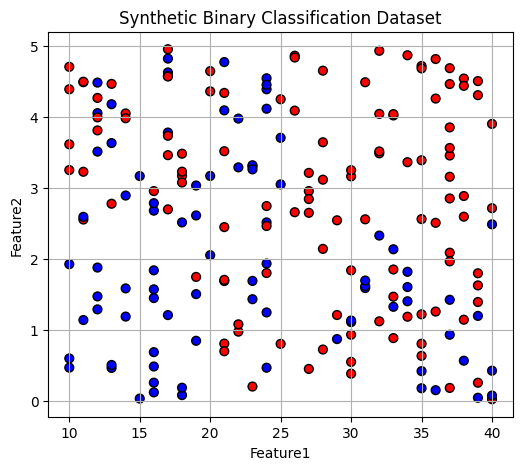

In [57]:
plt.figure(figsize=(6, 5))
plt.scatter(df['size'], df['color'], c=df['Target'], cmap='bwr', edgecolor='k', s=40)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Synthetic Binary Classification Dataset")
plt.grid(True)
plt.show()

In [58]:
df.columns

Index(['size', 'color', 'Target'], dtype='object')

In [59]:
len(df)

200

In [60]:
df['size'][0].dtype == 'int64'

True

In [61]:
type(sorted(df['size']))

list

In [62]:
len(df[(df['color'] == 'Blue') & (df['Target'] == 1)])


0

In [63]:
import numpy as np

def cross_entropy_catg(df, column, value, included=True):
    """
    this function calculate the cross entropy when you split on `value` of column

    :param df: dataframe
    :param column: column on which you are splitting
    :param value: value for split happen
    """
    if included:
        post_cnt = len(df[(df[column] == value) & (df['Target'] == 1)])
        negt_cnt = len(df[(df[column] == value) & (df['Target'] == 0)])
    else:
        post_cnt = len(df[df['Target'] == 1]) - len(df[(df[column] == value) & (df['Target'] == 1)])
        negt_cnt = len(df[df['Target'] == 0]) - len(df[(df[column] == value) & (df['Target'] == 0)])
    
    total = post_cnt + negt_cnt

    if total == 0:
        return 0

    entropy = 0
    if post_cnt > 0:
        entropy -= (post_cnt / total) * np.log2(post_cnt / total)
    if negt_cnt > 0:
        entropy -= (negt_cnt / total) * np.log2(negt_cnt / total)

    return entropy

In [64]:
import numpy as np

def cross_entropy_num(df, column, value, included=True):
    if included:
        subset = df[df[column] <= value]
    else:
        subset = df[df[column] > value]

    post_cnt = len(subset[subset['Target'] == 1])
    negt_cnt = len(subset[subset['Target'] == 0])
    total = post_cnt + negt_cnt

    if total == 0:
        return 0  # no samples to evaluate

    entropy = 0
    if post_cnt > 0:
        entropy -= (post_cnt / total) * np.log2(post_cnt / total)
    if negt_cnt > 0:
        entropy -= (negt_cnt / total) * np.log2(negt_cnt / total)

    return entropy


In [65]:
# cross_entropy_catg(df, 'color', 'Red', True)
cross_entropy_catg(df, 'color', 0, True)

0

In [66]:
cross_entropy_num(df, 'size', 20, True)

np.float64(0.9756797868933085)

In [67]:
def cross_entropy_parent(df):

    post_cnt = len(df[df['Target'] == 1])
    negt_cnt = len(df[df['Target'] == 0])
    total = post_cnt + negt_cnt

    if total == 0:
        return 0  # no samples to evaluate

    entropy = 0
    if post_cnt > 0:
        entropy -= (post_cnt / total) * np.log2(post_cnt / total)
    if negt_cnt > 0:
        entropy -= (negt_cnt / total) * np.log2(negt_cnt / total)

    return  entropy


In [68]:
def calculate_information_gain(df, column, criteria):
    parent_entropy = cross_entropy_parent(df)
    if type(df[column].iloc[0]) == str:
        include_node = cross_entropy_catg(df, column, criteria, True)
        except_node = cross_entropy_catg(df, column, criteria, False)
        weighted_average_entropy = len(df[df[column]==criteria])/ len(df) * (include_node) + len(df[df[column]!=criteria])/ len(df) * (except_node)
        return parent_entropy - weighted_average_entropy
    else:
        lesser_side = cross_entropy_num(df, column, criteria, True)
        greater_side = cross_entropy_num(df, column, criteria, False)
        # print(f"parent entropy: {parent_entropy}")
        # print(f"lesser_side: {lesser_side}")
        # print(f"greater_side: {greater_side}")
        weighted_average_entropy = len(df[df[column]<=criteria])/ len(df) * (lesser_side) + len(df[df[column]>criteria])/ len(df) * (greater_side)
        return parent_entropy - weighted_average_entropy

In [69]:
calculate_information_gain(df, 'color', 1)

np.float64(0.018475899715071242)

In [70]:
def best_threshold_to_split(df, column):
    if type(df[column].iloc[0]) == str:
        split_node = list(df[column].unique())
    else:
        sorted_attr = sorted(df[column])
        split_node = []
        for i in range(len(df)-1):
            split_node.append((sorted_attr[i] + sorted_attr[i+1])/2)
    # print(split_node)

    # if there is only one unique value in the df[column] return that this is not the best way to split
    if len(df[column].unique()) == 1:
        return -5500, df[column].iloc[0], column

    information_gain = []

    for criteria in split_node:
        "make a subset of the dataframe for particular criteria of the column"
        curr_ig = calculate_information_gain(df, column, criteria)
        information_gain.append(curr_ig)

    splitting_criteria_index = np.argmax(np.array(information_gain))

    # print(information_gain[splitting_criteria_index])
    return information_gain[splitting_criteria_index], split_node[splitting_criteria_index], column


In [71]:
columns = df.columns
columns

Index(['size', 'color', 'Target'], dtype='object')

In [72]:
for column in columns[:-1]:
    print(best_threshold_to_split(df, column))

(np.float64(0.08250790490006588), 25.0, 'size')
(np.float64(0.07746077194423528), 2.528124285983911, 'color')


In [73]:
zero_entropy_subset = []
splits_done = []

def solve(df, depth=0, max_depth=4, min_samples_split=10):
    if depth >= max_depth or len(df) < min_samples_split:
        zero_entropy_subset.append(df)
        return
    best_split = []
    # print(f"reached here.....0")
    for column in df.columns[:-1]:
        # print(f"Calling for column: {column}")
        best_split.append(best_threshold_to_split(df, column))
    
    # print(f"reached here.....1")

    best_split = sorted(best_split, key= lambda x : x[0], reverse=True)
    # print(f"reached here.....2")

    ig_value_at_split, value_at_split, column_at_split = best_split[0][0], best_split[0][1], best_split[0][2]

    if ig_value_at_split < 0.01 :
        zero_entropy_subset.append(df)
        return


    splits_done.append((value_at_split, column_at_split))
    
    # print(value_at_split, column_at_split)
    # print(df)

    if isinstance(value_at_split, str):
        df_left = df[df[column_at_split]==value_at_split]
        df_right = df[df[column_at_split]!=value_at_split]
    else:
        df_left = df[df[column_at_split]<=value_at_split]
        df_right = df[df[column_at_split]>value_at_split]

    if cross_entropy_parent(df_left) < 0.01:
        zero_entropy_subset.append(df_left)
    else:
        # print(f"Calling left Part")
        solve(df_left, depth+1, max_depth, min_samples_split)
    if cross_entropy_parent(df_right) < 0.01:
        zero_entropy_subset.append(df_right)
    else:
        # print(f"Calling right Part")
        # print("-----")
        # print(df_right)
        # print("-----")
        solve(df_right, depth+1, max_depth, min_samples_split)

solve(df, max_depth=5, min_samples_split=10)


In [74]:
len(zero_entropy_subset)

14

In [75]:
for df in zero_entropy_subset:
    print("----------------")
    print(df)
    print("----------------")

----------------
     size     color  Target
0      16  1.571780       0
8      16  1.448757       0
22     11  1.139676       0
26     15  0.034761       0
30     10  0.599327       0
41     19  1.504392       0
56     14  1.188188       0
69     18  0.082939       0
77     16  0.687605       0
82     12  1.289708       0
87     17  1.209261       0
88     13  0.465514       0
104    13  0.507358       0
135    16  0.121580       0
148    12  1.472244       0
151    14  1.584610       0
152    19  0.847464       0
157    16  0.485882       0
181    10  0.469910       0
189    18  0.186741       0
198    16  0.258409       0
----------------
----------------
     size     color  Target
3      24  1.246461       0
66     23  0.203876       1
100    21  0.808144       1
107    25  0.804040       1
120    24  0.468374       0
132    22  0.976215       1
160    21  0.700420       1
186    23  1.432706       0
195    22  1.079105       1
----------------
----------------
     size     color

In [ ]:
sizes = np.random.randint(10, 41, size=200)           # size between 10 and 40
colors = np.random.uniform(0, 5, size=200)            # color feature now continuous between 0 and 5

# Define target with a heuristic
targets = []
for s, c in zip(sizes, colors):
    if s > 25 and c > 2.5:
        targets.append(1)
    elif s < 18 and c < 2:
        targets.append(0)
    else:
        targets.append(np.random.choice([0, 1]))

# Build final DataFrame
data = pd.DataFrame({
    'size': sizes,
    'color': colors,
    'Target': targets
})

df = data

In [77]:
splits_done

[(25.0, 'size'),
 (1.6363429413997639, 'color'),
 (19.0, 'size'),
 (21.0, 'size'),
 (3.1673336681782955, 'color'),
 (20.0, 'size'),
 (11.0, 'size'),
 (4.316406909687897, 'color'),
 (4.179559927884591, 'color'),
 (2.4969120014489627, 'color'),
 (28.0, 'size'),
 (2.111296979437588, 'color'),
 (1.8283635135968188, 'color')]

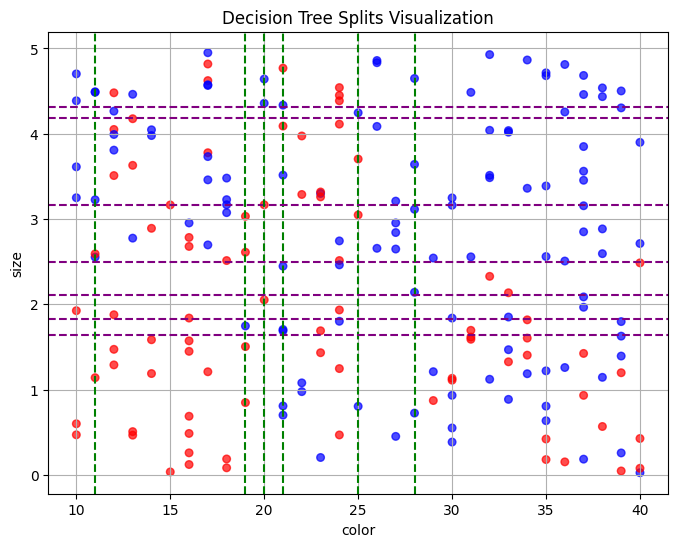

In [ ]:
colors = ['red' if t == 0 else 'blue' for t in df['Target']]
plt.figure(figsize=(8, 6))
plt.scatter(df['size'], df['color'], c=colors, s=30, alpha=0.7)

# Draw each split
for val, col in splits_done:
    if col == 'size':
        plt.axvline(x=val, color='green', linestyle='--')
    elif col == 'color':
        plt.axhline(y=val, color='purple', linestyle='--')

plt.title("Decision Tree Splits Visualization")
plt.xlabel("color")
plt.ylabel("size")
plt.grid(True)
plt.show()


Above code is only for visualization

If you want to store the tree and want to check the accuracy on test, simply used the Binary tree data structure. Store the split criteria, column at each split in the same pattern as they are occuring. Also, at the time of splitting you can also store maximun count of target variable at the particulat subset of split so, at the end you will get what the leaf node expressing to.